# Decomposição

## Concentração de CO2

**Concentração de CO2 na Atmosfera em ppm de março de 1958 a Dezembro de 2001 - Observatorio Mauna Loa, Havai**

In [1]:
# Import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Grafico figura
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# Import da statsmodels API
import statsmodels.api as sm

In [4]:
# Impotando o DataSet CO2
concentracao = sm.datasets.co2.load_pandas().data
concentracao

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [5]:
# Analise de Valores Nulos
concentracao.isnull().sum()

co2    59
dtype: int64

In [6]:
# Drop dos Valores Nulos
concentracao.dropna(inplace=True)

In [7]:
# Criando a serie
serie = pd.Series(concentracao['co2'].values, index=concentracao.index)
serie

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Length: 2225, dtype: float64

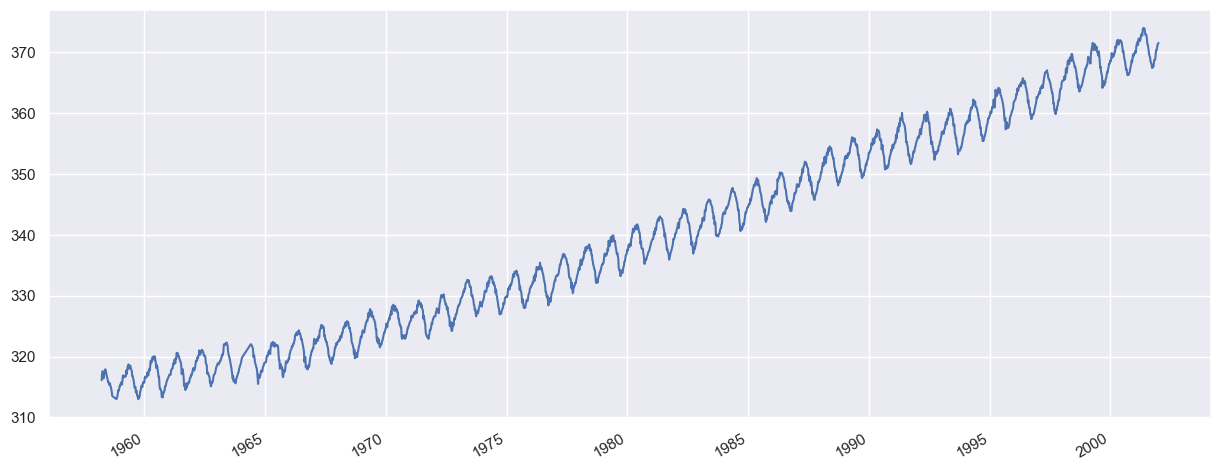

In [8]:
# Plot
serie.plot();

In [9]:
# Import da biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# Você só deve utilizar o argumento 'period' em seasonal_decompose quando x não for um objeto do pandas ou quando o index 
# de x não possuir uma frequência. Quando cai nesses casos, o argumento torna-se inesperado e lança o erro.
decomposicao = seasonal_decompose(serie, period=25)

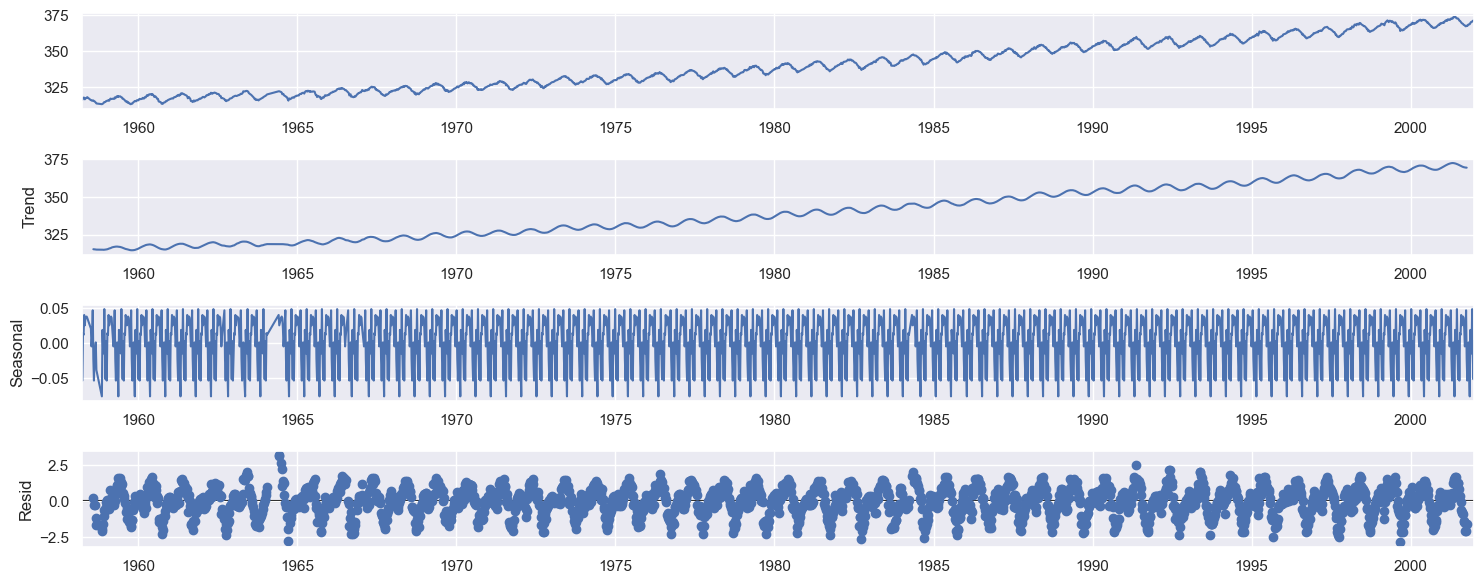

In [11]:
# Plot grafico
decomposicao.plot();

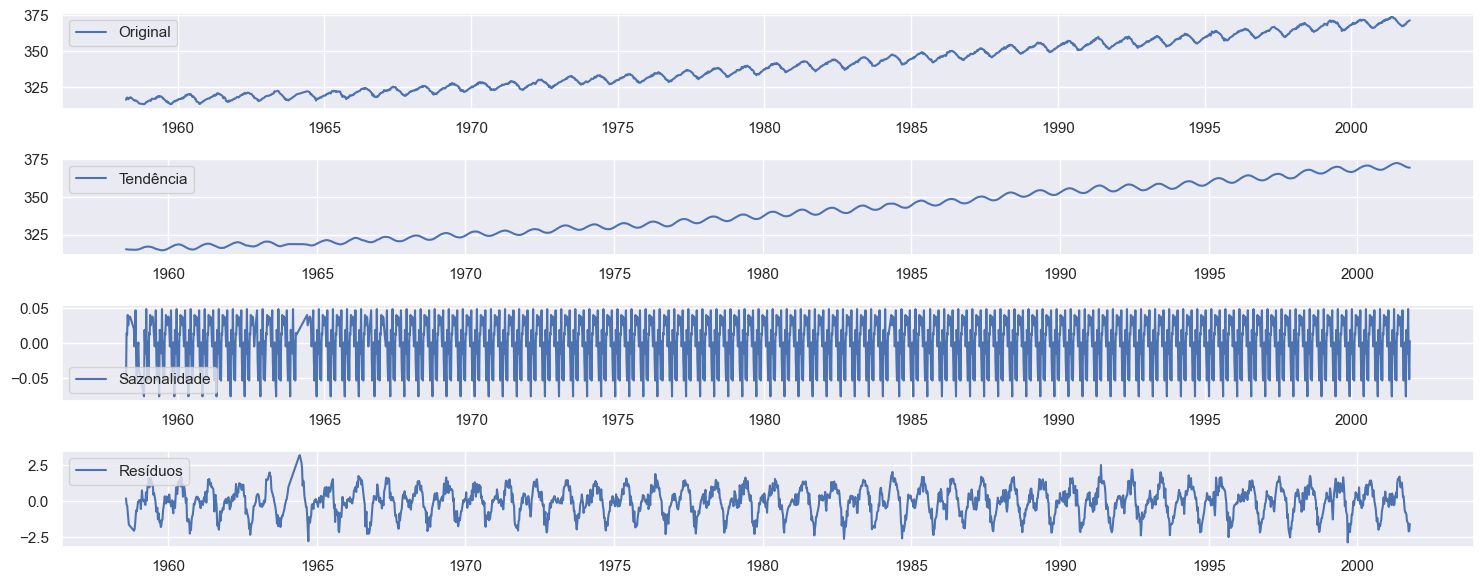

In [12]:
# Plotagem com legendas dos graficos
plt.subplot(411)
plt.plot(serie, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposicao.seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout();

In [13]:
# Decomposicao
decomp_mult = seasonal_decompose(serie, period=7, model='multiplicative')

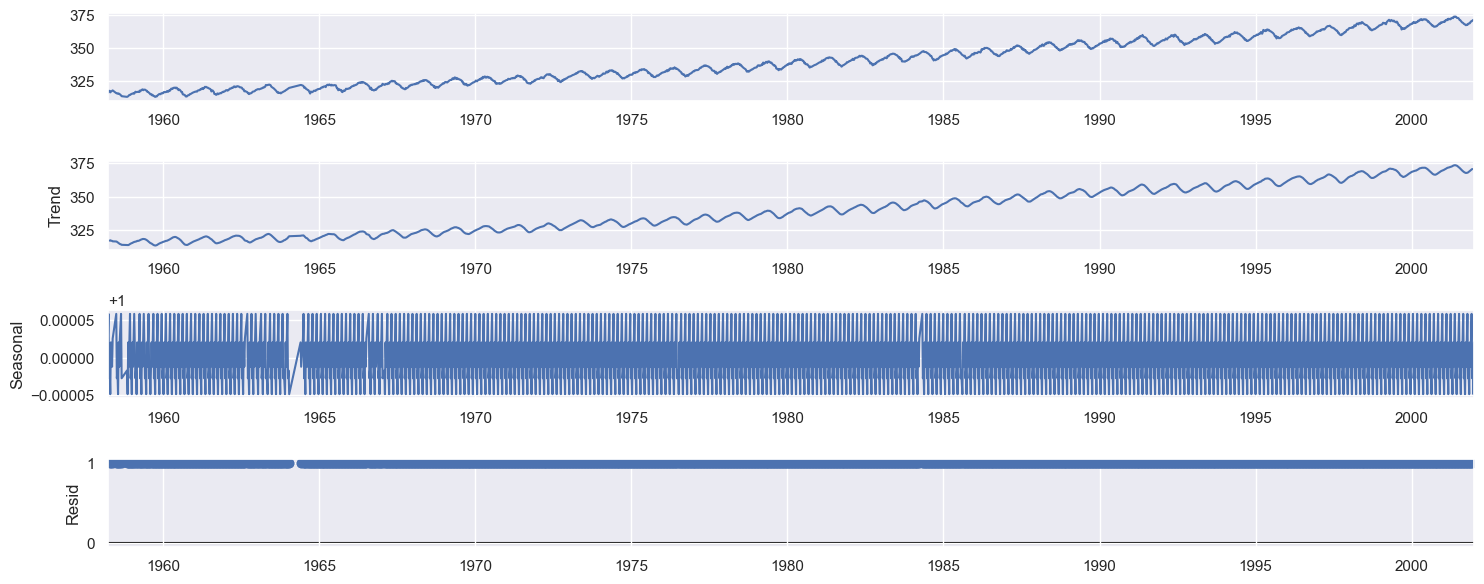

In [14]:
# Plot
decomp_mult.plot();

### **DECOMPOSIÇÃO MANCHAS SOLARES 1**

**Número médio mensal de manchas solares relativas de 1749 a 1983. Coletados no Observatório Federal Suíço, Zurique até 1960, e depois no Observatório Astronômico de Tóquio..**

In [15]:
manchas_solares = pd.read_csv('sunspots.csv')
manchas_solares

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


In [16]:
manchas_solares.columns = ['valores']
manchas_solares.head()

,valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


In [17]:
manchas_solares = manchas_solares.reset_index(drop=True) # drop é para excluir o índice anterior
manchas_solares

,valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [18]:
indice = pd.date_range('1749', periods = len(manchas_solares), freq = 'M')
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

In [19]:
serie2 = pd.Series(manchas_solares['valores'].values, index = indice)

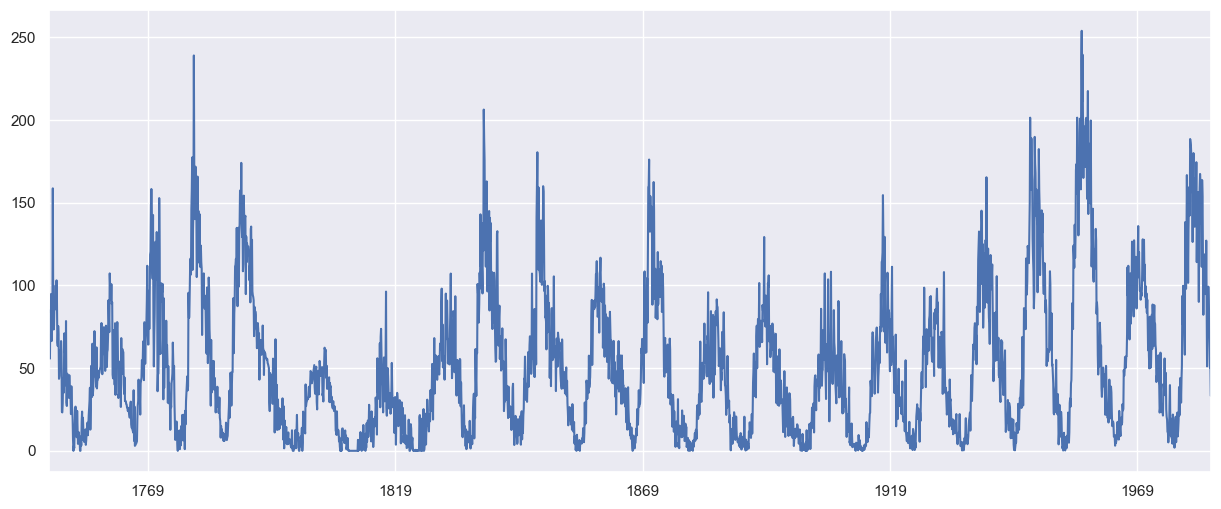

In [20]:
serie2.plot();

In [21]:
decomposicao2 = seasonal_decompose(serie2)

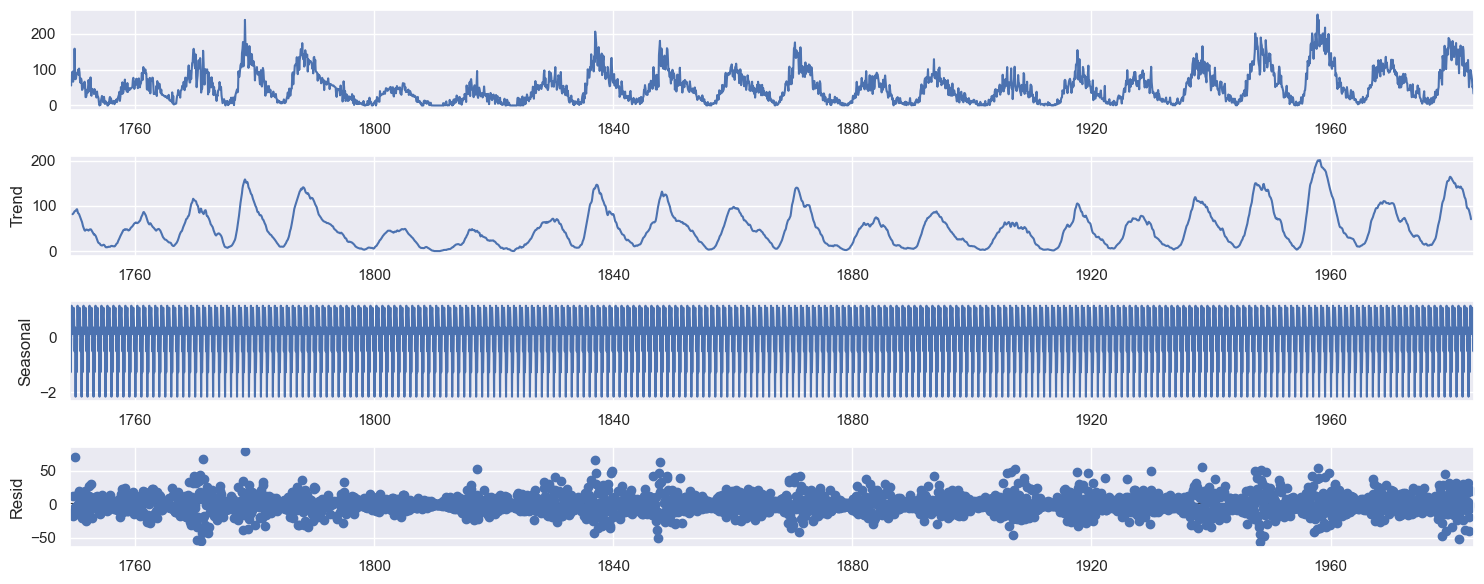

In [22]:
decomposicao2.plot();

In [23]:
# O Multiplicativo nao e adequando para valores negativos
#decom_mult2 = seasonal_decompose(serie2, model='multiplicative')

### **Decomposição Manchas solares 2**

In [24]:
import statsmodels.api as sm

In [25]:
# Importação do Dataset Manchas Solares do Python
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [26]:
indice = pd.date_range('1700', periods = len(manchas_solares), freq = 'Y')
indice

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq='A-DEC')

In [27]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

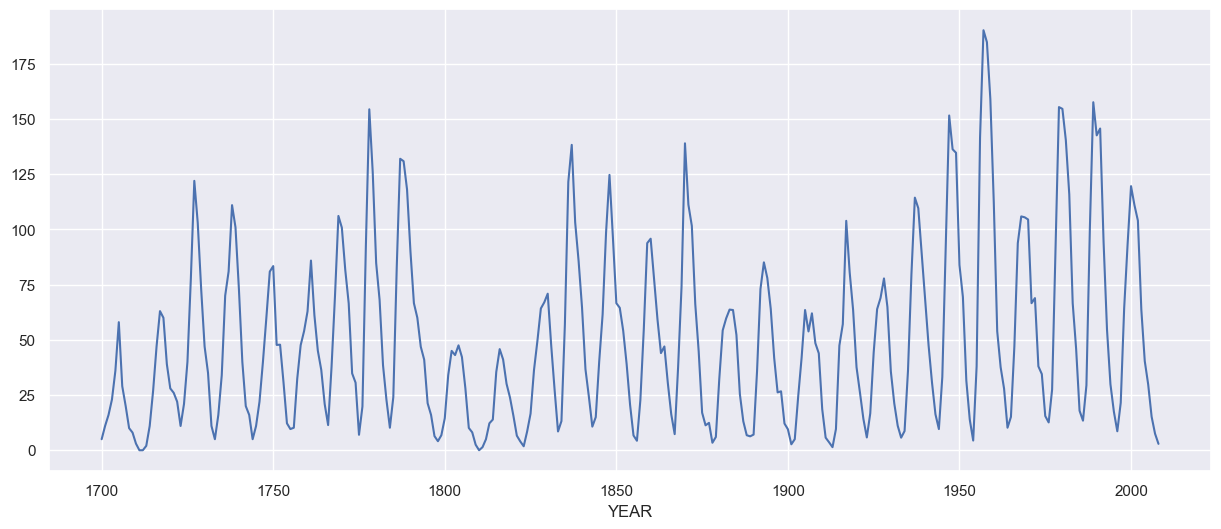

In [28]:
serie3.plot();

In [29]:
decomposicao3 = seasonal_decompose(serie3, period=2)

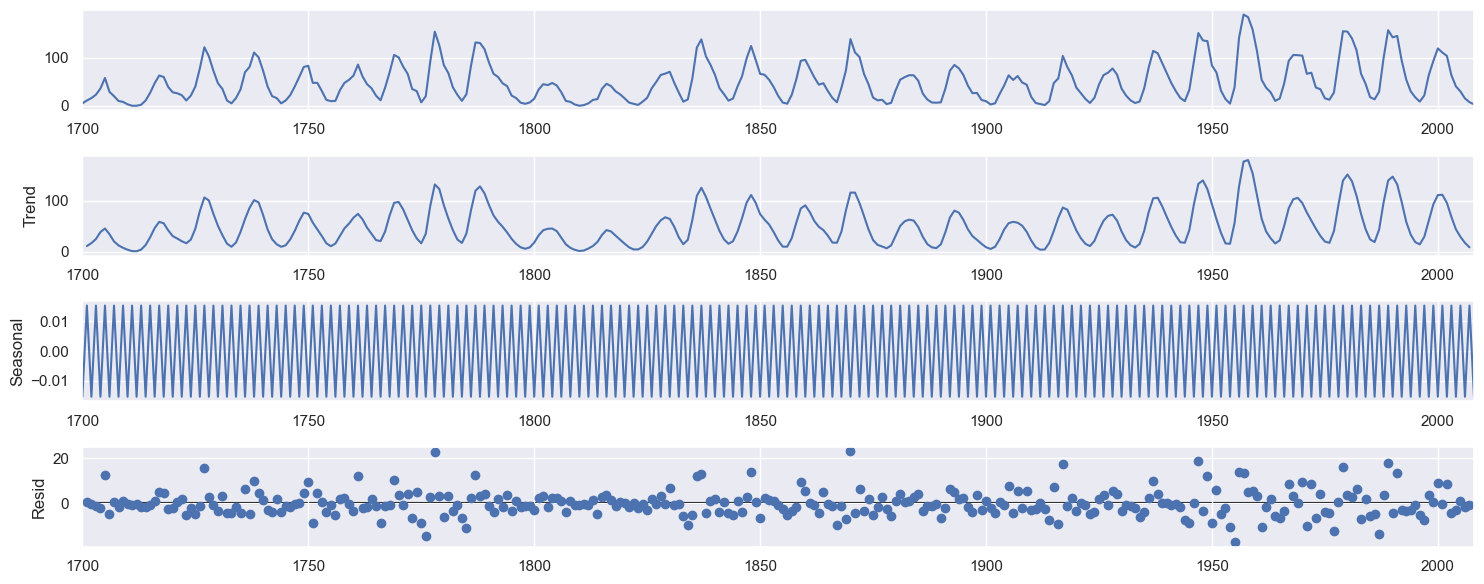

In [30]:
decomposicao3.plot();

In [31]:
serie4 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = indice)
serie4

1700-12-31     5.0
1701-12-31    11.0
1702-12-31    16.0
1703-12-31    23.0
1704-12-31    36.0
              ... 
2004-12-31    40.4
2005-12-31    29.8
2006-12-31    15.2
2007-12-31     7.5
2008-12-31     2.9
Freq: A-DEC, Length: 309, dtype: float64

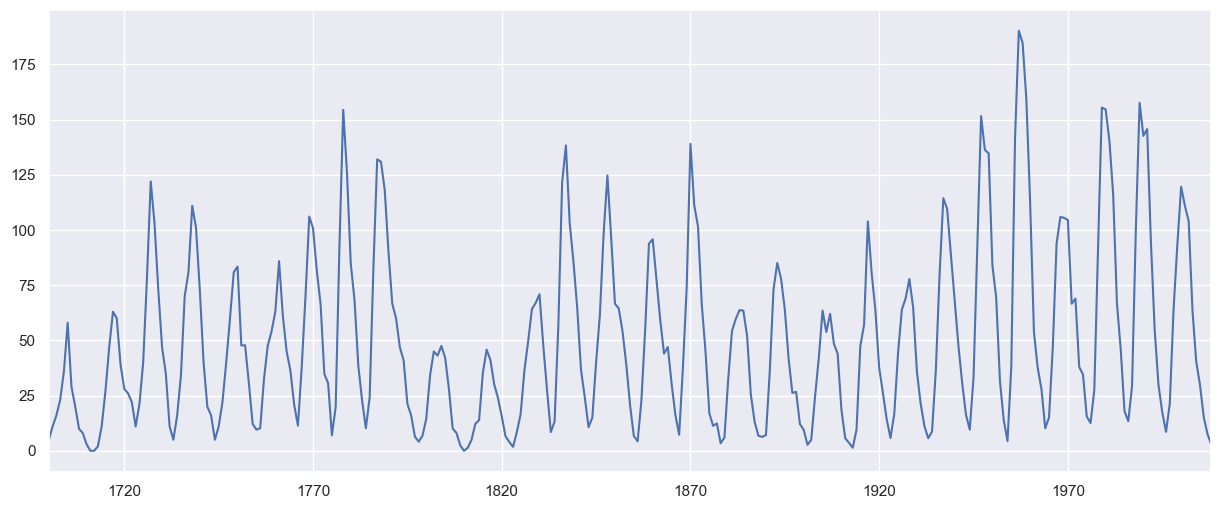

In [32]:
serie4.plot();

In [33]:
decomposicao4 = seasonal_decompose(serie4,period=3)

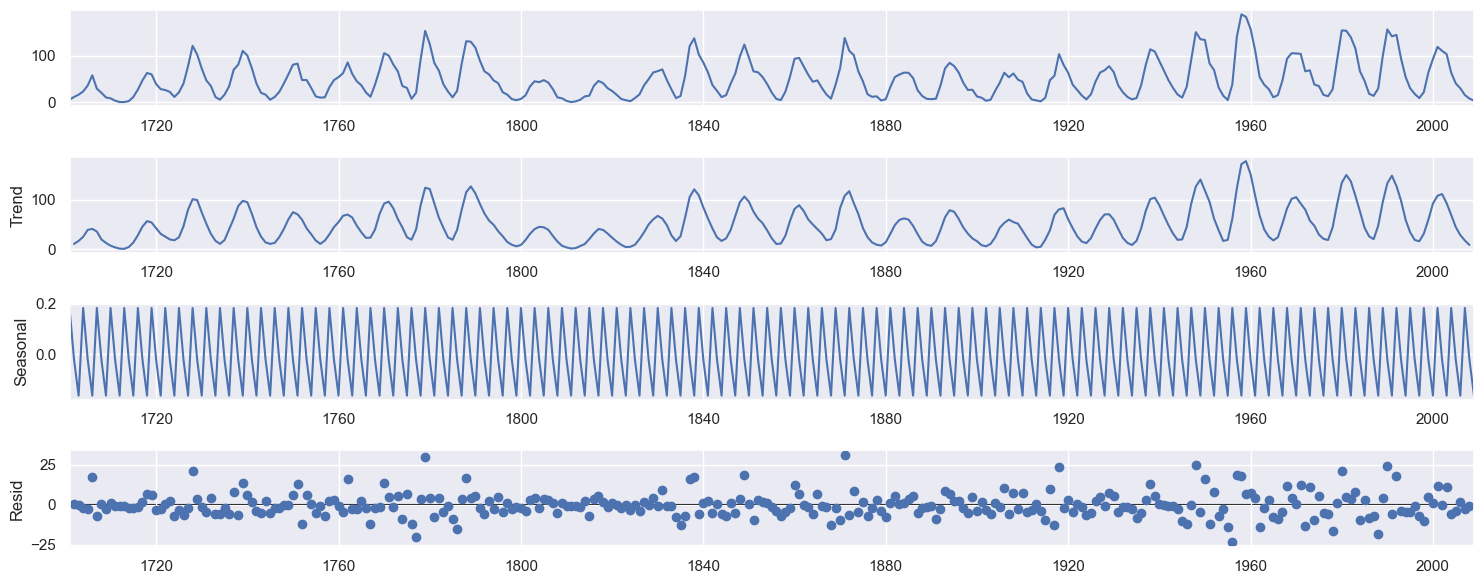

In [34]:
decomposicao4.plot();

In [35]:
# OBS: As vezes posso e nao posso utiliza o multiplicador